## Overview
Now that we have our .csv, we are ready to import it into our Jupyter Notebook as a Pandas dataframe and complete some clean up, analysis and visualization.

***Analysis***
Once the data was completely ready, we set out to answer a series of questions for Microsoft:

* Is this a good time to get into the movie business?
* Which were the most profitable?
* What are the most profitable genres?
* To make a successful movie, What is the lowest your budget can be (the budget floor)?
* Who are key competitors what films did they make?

We used Pandas methods to answer these questions, including .groupby and .describe to subset the data to answer these questions.

***Visualizations***
We visualized each question with an approproate graph to quickly communicate our insights.  We used boxplots, bar charts, scatter plots, and a correlation heat map to communicate our findings and support our recommendations.


In [15]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualization


In [16]:
master_df = pd.read_csv('cleaned_master_df.csv')
master_df = master_df.drop('Unnamed: 0',axis=1)
master_df.head()

# imported csv.file and dropped column with null values

,rank,title,worldwide_lifetime_gross,domestic_lifetime_gross,domestic_per,foreign_lifetime_gross,foreign_per,year,imdb_id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,collection_id,genres_clean,production_companies_clean
0,1,Avengers: Endgame,2797800564,858373000,30.7%,1939427564,69.3%,2019,tt4154796,356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",en,38.57,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,181.00,86311,'Adventure',"'Marvel Studios',"
1,2,Avatar,2790439000,760507625,27.2%,2029931375,72.8%,2009,tt0499549,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,29.74,"[""[{'id':"", '444,', ""'logo_path':"", ""'/42UPdZl...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,162.00,87096,'Action',"'Dune Entertainment',"
2,3,Titanic,2194439542,659363944,30%,1535075598,70%,1997,tt0120338,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,26.45,"[""[{'id':"", '4,', ""'logo_path':"", ""'/fycMZt242...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,194.00,0,'Drama',"'Paramount', 'origin_country':"
3,4,Star Wars: Episode VII - The Force Awakens,2068223624,936662225,45.3%,1131561399,54.7%,2015,tt2488496,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,28.81,"[""[{'id':"", '1634,', ""'logo_path':"", 'None,', ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,136.00,10,'Action',"'Truenorth Productions',"
4,5,Avengers: Infinity War,2048359754,678815482,33.1%,1369544272,66.9%,2018,tt4154756,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,84.77,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,149.00,86311,'Adventure',"'Marvel Studios',"


In [17]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 20 columns):
rank                          995 non-null object
title                         995 non-null object
worldwide_lifetime_gross      995 non-null int64
domestic_lifetime_gross       995 non-null int64
domestic_per                  995 non-null object
foreign_lifetime_gross        995 non-null int64
foreign_per                   995 non-null object
year                          995 non-null int64
imdb_id                       995 non-null object
budget                        995 non-null int64
genres                        995 non-null object
original_language             995 non-null object
popularity                    995 non-null float64
production_companies          995 non-null object
production_countries          995 non-null object
release_date                  995 non-null object
runtime                       995 non-null float64
collection_id                 995 non-null int64

In [18]:
pd.options.display.float_format = "{:.2f}".format

master_df.describe()

# converting display using .float_format command

,worldwide_lifetime_gross,domestic_lifetime_gross,foreign_lifetime_gross,year,budget,popularity,runtime,collection_id
count,995.00,995.00,995.00,995.00,995.00,995.00,995.00,995.00
mean,394684914.63,154036546.13,240648368.50,2006.71,88551278.52,18.76,116.84,84988.84
std,289137966.60,107185711.54,202437044.44,10.05,61953011.28,15.83,21.39,157097.30
min,165615285.00,6752.00,0.00,1937.00,0.00,0.62,70.00,0.00
25%,213867515.50,90024834.00,116050551.00,2001.00,40000000.00,12.28,101.00,0.00
50%,297002527.00,127004179.00,178839854.00,2009.00,75000000.00,15.50,115.00,264.00
75%,456899689.50,183527522.00,286618824.50,2014.00,130000000.00,21.16,129.00,94317.00
max,2797800564.00,936662225.00,2029931375.00,2020.00,380000000.00,272.71,233.00,680443.00


In [19]:
master_df.head()

,rank,title,worldwide_lifetime_gross,domestic_lifetime_gross,domestic_per,foreign_lifetime_gross,foreign_per,year,imdb_id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,collection_id,genres_clean,production_companies_clean
0,1,Avengers: Endgame,2797800564,858373000,30.7%,1939427564,69.3%,2019,tt4154796,356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",en,38.57,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,181.00,86311,'Adventure',"'Marvel Studios',"
1,2,Avatar,2790439000,760507625,27.2%,2029931375,72.8%,2009,tt0499549,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,29.74,"[""[{'id':"", '444,', ""'logo_path':"", ""'/42UPdZl...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,162.00,87096,'Action',"'Dune Entertainment',"
2,3,Titanic,2194439542,659363944,30%,1535075598,70%,1997,tt0120338,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,26.45,"[""[{'id':"", '4,', ""'logo_path':"", ""'/fycMZt242...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,194.00,0,'Drama',"'Paramount', 'origin_country':"
3,4,Star Wars: Episode VII - The Force Awakens,2068223624,936662225,45.3%,1131561399,54.7%,2015,tt2488496,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,28.81,"[""[{'id':"", '1634,', ""'logo_path':"", 'None,', ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,136.00,10,'Action',"'Truenorth Productions',"
4,5,Avengers: Infinity War,2048359754,678815482,33.1%,1369544272,66.9%,2018,tt4154756,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,84.77,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,149.00,86311,'Adventure',"'Marvel Studios',"


In [23]:
master_df['profitability'] = master_df['worldwide_lifetime_gross'] - master_df['budget']

# calulating new column with profitability per movie 

In [24]:
table_last_fifty_years = master_df.loc[master_df['year']>1970]
table_last_fifty_years

# created a subset of data using year > 1970 to focus on the last 50 years of blockbuster movies only 

,rank,title,worldwide_lifetime_gross,domestic_lifetime_gross,domestic_per,foreign_lifetime_gross,foreign_per,year,imdb_id,budget,...,original_language,popularity,production_companies,production_countries,release_date,runtime,collection_id,genres_clean,production_companies_clean,profitability
0,1,Avengers: Endgame,2797800564,858373000,30.7%,1939427564,69.3%,2019,tt4154796,356000000,...,en,38.57,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,181.00,86311,'Adventure',"'Marvel Studios',",2441800564
1,2,Avatar,2790439000,760507625,27.2%,2029931375,72.8%,2009,tt0499549,237000000,...,en,29.74,"[""[{'id':"", '444,', ""'logo_path':"", ""'/42UPdZl...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,162.00,87096,'Action',"'Dune Entertainment',",2553439000
2,3,Titanic,2194439542,659363944,30%,1535075598,70%,1997,tt0120338,200000000,...,en,26.45,"[""[{'id':"", '4,', ""'logo_path':"", ""'/fycMZt242...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,194.00,0,'Drama',"'Paramount', 'origin_country':",1994439542
3,4,Star Wars: Episode VII - The Force Awakens,2068223624,936662225,45.3%,1131561399,54.7%,2015,tt2488496,245000000,...,en,28.81,"[""[{'id':"", '1634,', ""'logo_path':"", 'None,', ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,136.00,10,'Action',"'Truenorth Productions',",1823223624
4,5,Avengers: Infinity War,2048359754,678815482,33.1%,1369544272,66.9%,2018,tt4154756,300000000,...,en,84.77,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,149.00,86311,'Adventure',"'Marvel Studios',",1748359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,"1,010",Magic Mike,167739368,113721571,67.8%,54017797,32.2%,2012,tt1915581,7000000,...,en,11.41,"[""[{'id':"", '34981,', ""'logo_path':"", 'None,',...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-06-28,110.00,328247,'Drama','Iron Horse,160739368
991,"1,011",Alexander,167298192,34297191,20.5%,133001001,79.5%,2004,tt0346491,155000000,...,en,12.52,"[""[{'id':"", '54997,', ""'logo_path':"", 'None,',...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2004-11-21,175.00,0,'War','WR Universal,12298192
992,"1,012",Up in the Air,166842739,83823381,50.2%,83019358,49.8%,2009,tt1193138,25000000,...,en,13.78,"[""[{'id':"", '32157,', ""'logo_path':"", ""'/nBD7u...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-05,110.00,0,'Drama','Right of,141842739
993,"1,013",Nutty Professor II: The Klumps,166339890,123309890,74.1%,43030000,25.9%,2000,tt0144528,84000000,...,en,11.84,"[""[{'id':"", '33,', ""'logo_path':"", ""'/8lvHyhjr...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-07-27,106.00,86028,'Fantasy',"'Universal Pictures',",82339890


In [25]:
table_last_fifty_years.describe()

,worldwide_lifetime_gross,domestic_lifetime_gross,foreign_lifetime_gross,year,budget,popularity,runtime,collection_id,profitability
count,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00,990.00
mean,395384271.29,154031933.90,241352337.39,2007.00,88984015.86,18.77,116.88,85129.79,306400255.43
std,289646963.83,107427797.18,202638978.55,9.17,61808310.90,15.87,20.97,157446.16,260085393.98
min,165615285.00,6752.00,0.00,1972.00,0.00,0.62,72.00,0.00,-559276.00
25%,214019872.75,89720713.25,116333315.75,2001.00,40000000.00,12.25,101.00,0.00,152098568.75
50%,298145755.00,126875924.50,179056751.00,2009.00,76000000.00,15.50,115.00,263.50,224582469.50
75%,458580499.50,183346616.00,287697562.25,2014.00,130000000.00,21.18,129.00,93971.75,365531879.75
max,2797800564.00,936662225.00,2029931375.00,2020.00,380000000.00,272.71,201.00,680443.00,2553439000.00


In [26]:
blockbuster_movies_by_year = table_last_fifty_years['year'].value_counts()
blockbuster_movies_by_year

# blockbuster movies by counts to evaluate general trend 

2017    55
2016    53
2018    47
2014    47
2013    47
2012    45
2011    44
2015    43
2019    43
2010    42
2008    41
2009    38
2007    34
2004    34
2003    33
2002    31
2001    26
2000    26
2006    25
2005    25
1998    24
1999    23
1997    21
1995    19
1996    16
1994    16
1993    11
1992    11
1991    11
1990    11
1989     8
1988     8
1985     4
2020     4
1987     4
1984     3
1978     3
1977     3
1986     2
1982     2
1983     1
1981     1
1980     1
1979     1
1975     1
1973     1
1972     1
Name: year, dtype: int64

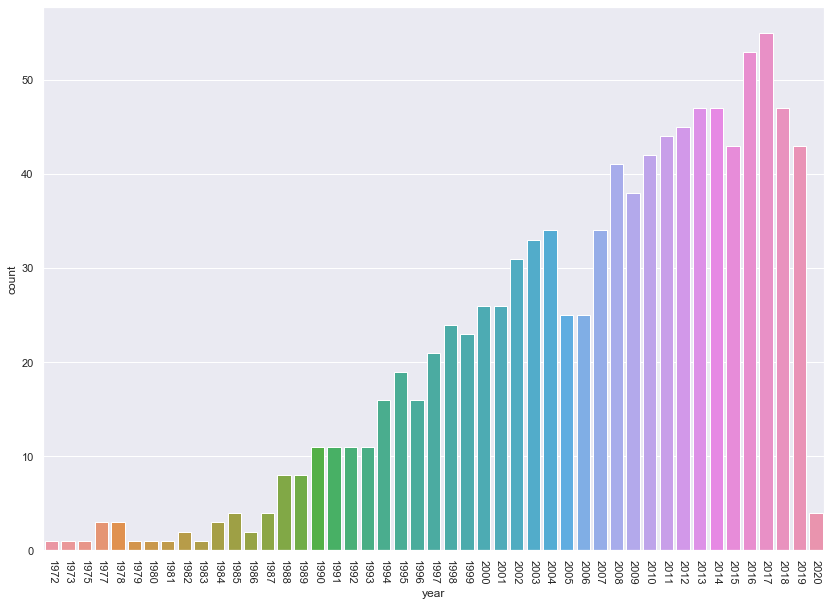

In [27]:
sns.countplot(x = 'year', data=table_last_fifty_years) 
# Rotate x-labels
plt.xticks(rotation=-90)
sns.set(rc={'figure.figsize':(14,10)})

# graph 1 

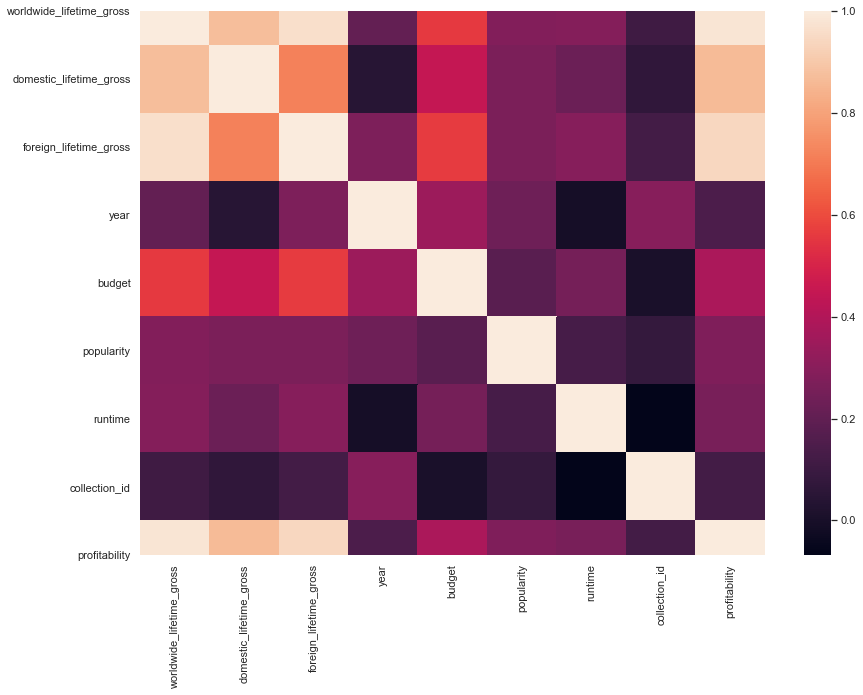

In [28]:
# Calculate correlations
corr = table_last_fifty_years.corr()
 
# Heatmap
sns.heatmap(corr)

# Graph 2 - Important Note - the strength of the relationship between X and Y is sometimes expressed by squaring the correlation coefficient 
# and multiplying by 100. The resulting statistic is known as variance explained (or R2). 
#Example: a correlation of 0.5 means 0.4^2x100 = 16% of the variance in Y is "explained" or predicted by the X variable

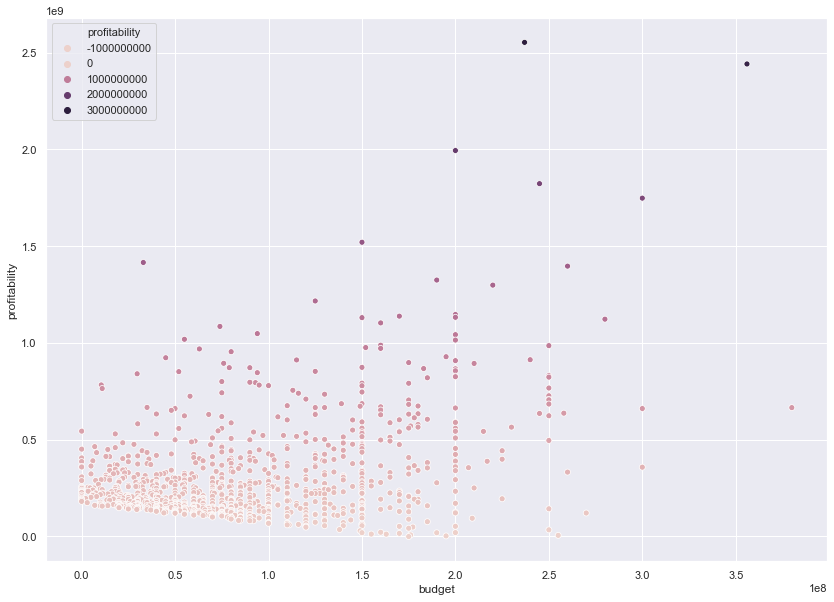

In [29]:
sns.set()
data = table_last_fifty_years
sns.scatterplot(data['budget'], data['profitability'], hue=data['profitability'])

# Graph 3 - exploring relationships between profitability and budget 

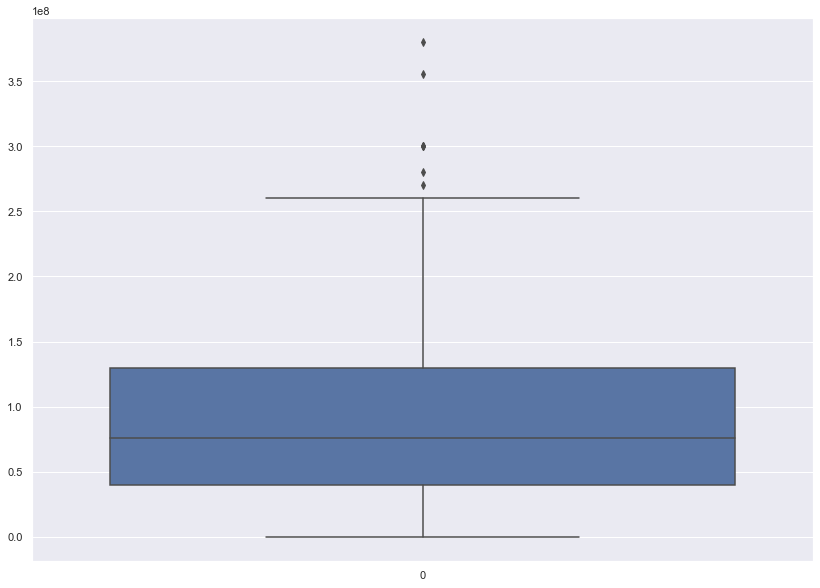

In [13]:
sns.boxplot(data=table_last_fifty_years['budget'])

# Graph 4- using a box plot to better understand varible - 'budget'

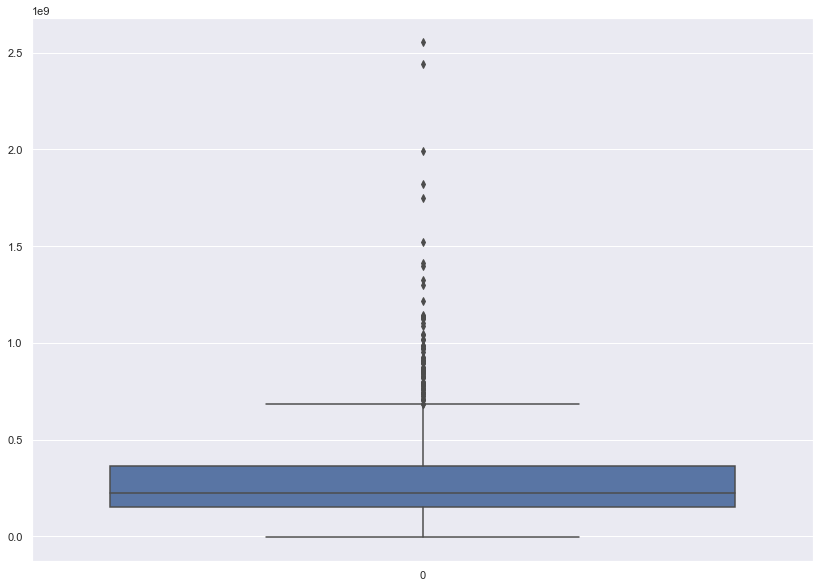

In [30]:
sns.boxplot(data=table_last_fifty_years['profitability'])

# Graph 5- using a box plot to better understand varible - 'profitability'

In [31]:
avg_worldwide_revenues_by_year = master_df.groupby('year')['worldwide_lifetime_gross'].sum().reset_index()
avg_worldwide_revenues_by_year[1:-1]

# gross blockbuster movie revenue by year 

,year,worldwide_lifetime_gross
1,1939,402352579
2,1942,267447150
3,1961,216026182
4,1967,210310084
5,1972,246120974
6,1973,441306145
7,1975,471203004
8,1977,1319523714
9,1978,885297173
10,1979,210308099


(array([1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 <a list of 7 Text xticklabel objects>)

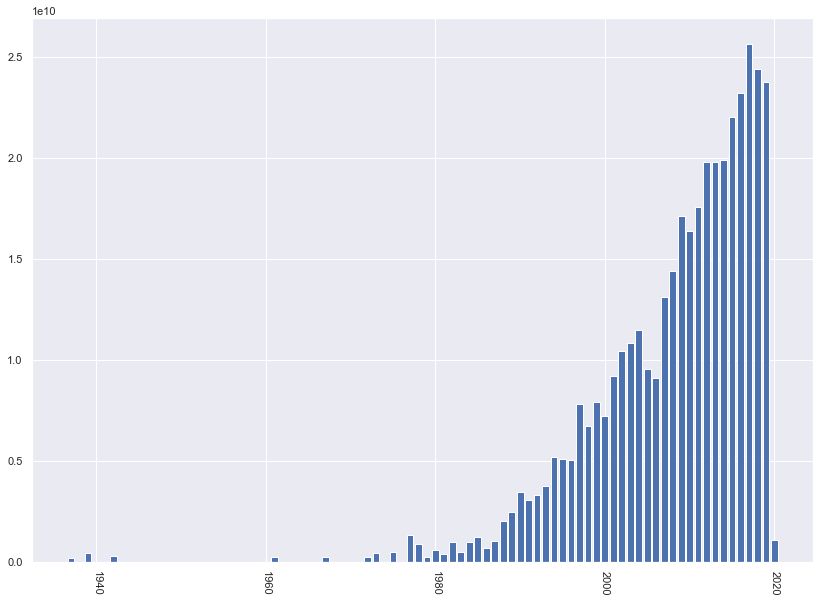

In [32]:
plt.bar(x=avg_worldwide_revenues_by_year['year'],height=avg_worldwide_revenues_by_year['worldwide_lifetime_gross'])
# Rotate x-labels
plt.xticks(rotation=-90)

# Graph 6 - plotting worlwide revenue trends 

In [33]:
master_df['profitability'] = master_df['worldwide_lifetime_gross'] - master_df['budget']
master_df['profitability']

# calculating profitability for movies 

0      2441800564
1      2553439000
2      1994439542
3      1823223624
4      1748359754
          ...    
990     160739368
991      12298192
992     141842739
993      82339890
994     121615285
Name: profitability, Length: 995, dtype: int64

In [34]:
avg_profitability_by_genre = master_df.groupby('genres_clean')['profitability'].sum().reset_index()
avg_profitability_by_genre[1:-1]

# profitability by genres

,genres_clean,profitability
1,'Adventure',64564270341
2,'Animation',27261438829
3,'Comedy',33262867235
4,'Crime',5311580786
5,'Documentary',216446882
6,'Drama',29894282766
7,'Family',7361742140
8,'Fantasy',13568471340
9,'History',1580739872
10,'Horror',6800158998


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

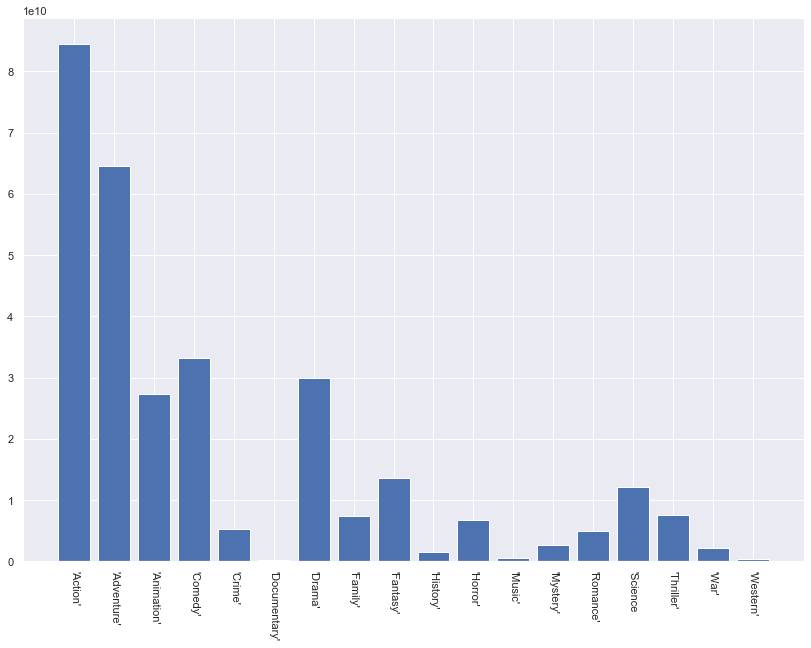

In [35]:
# Count Plot (a.k.a. Bar Plot)
plt.bar(x=avg_profitability_by_genre['genres_clean'],height=avg_profitability_by_genre['profitability'])
# Rotate x-labels
plt.xticks(rotation=-90)

# Graph 7 - profitibility by genres

In [36]:
master_df.head()

,rank,title,worldwide_lifetime_gross,domestic_lifetime_gross,domestic_per,foreign_lifetime_gross,foreign_per,year,imdb_id,budget,...,original_language,popularity,production_companies,production_countries,release_date,runtime,collection_id,genres_clean,production_companies_clean,profitability
0,1,Avengers: Endgame,2797800564,858373000,30.7%,1939427564,69.3%,2019,tt4154796,356000000,...,en,38.57,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,181.00,86311,'Adventure',"'Marvel Studios',",2441800564
1,2,Avatar,2790439000,760507625,27.2%,2029931375,72.8%,2009,tt0499549,237000000,...,en,29.74,"[""[{'id':"", '444,', ""'logo_path':"", ""'/42UPdZl...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,162.00,87096,'Action',"'Dune Entertainment',",2553439000
2,3,Titanic,2194439542,659363944,30%,1535075598,70%,1997,tt0120338,200000000,...,en,26.45,"[""[{'id':"", '4,', ""'logo_path':"", ""'/fycMZt242...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,194.00,0,'Drama',"'Paramount', 'origin_country':",1994439542
3,4,Star Wars: Episode VII - The Force Awakens,2068223624,936662225,45.3%,1131561399,54.7%,2015,tt2488496,245000000,...,en,28.81,"[""[{'id':"", '1634,', ""'logo_path':"", 'None,', ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,136.00,10,'Action',"'Truenorth Productions',",1823223624
4,5,Avengers: Infinity War,2048359754,678815482,33.1%,1369544272,66.9%,2018,tt4154756,300000000,...,en,84.77,"[""[{'id':"", '420,', ""'logo_path':"", ""'/hUzeosd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,149.00,86311,'Adventure',"'Marvel Studios',",1748359754


In [54]:
key_competitors = master_df.groupby('production_companies_clean')['profitability'].sum().reset_index()
top_10_competitors = key_competitors.sort_values('profitability',ascending=False).reset_index()
top_10_competitors.head(10)

# Identifying key competitors using profitability 

,index,production_companies_clean,profitability
0,352,'Walt Disney,25009637357
1,210,"'Marvel Studios',",18198555479
2,341,"'Universal Pictures',",17681706989
3,242,"'Paramount', 'origin_country':",14181943627
4,92,"'DreamWorks Animation',",9562774167
5,64,"'Columbia Pictures',",9396514355
6,254,"'Pixar', 'origin_country':",9279053371
7,199,"'Lucasfilm', 'origin_country':",7997027803
8,355,'Warner Bros.,7897951499
9,227,'New Line,6089424575


In [56]:
top_ten = top_10_competitors.iloc[0:10]
top_ten

# Top 10 competitors 

,index,production_companies_clean,profitability
0,352,'Walt Disney,25009637357
1,210,"'Marvel Studios',",18198555479
2,341,"'Universal Pictures',",17681706989
3,242,"'Paramount', 'origin_country':",14181943627
4,92,"'DreamWorks Animation',",9562774167
5,64,"'Columbia Pictures',",9396514355
6,254,"'Pixar', 'origin_country':",9279053371
7,199,"'Lucasfilm', 'origin_country':",7997027803
8,355,'Warner Bros.,7897951499
9,227,'New Line,6089424575


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

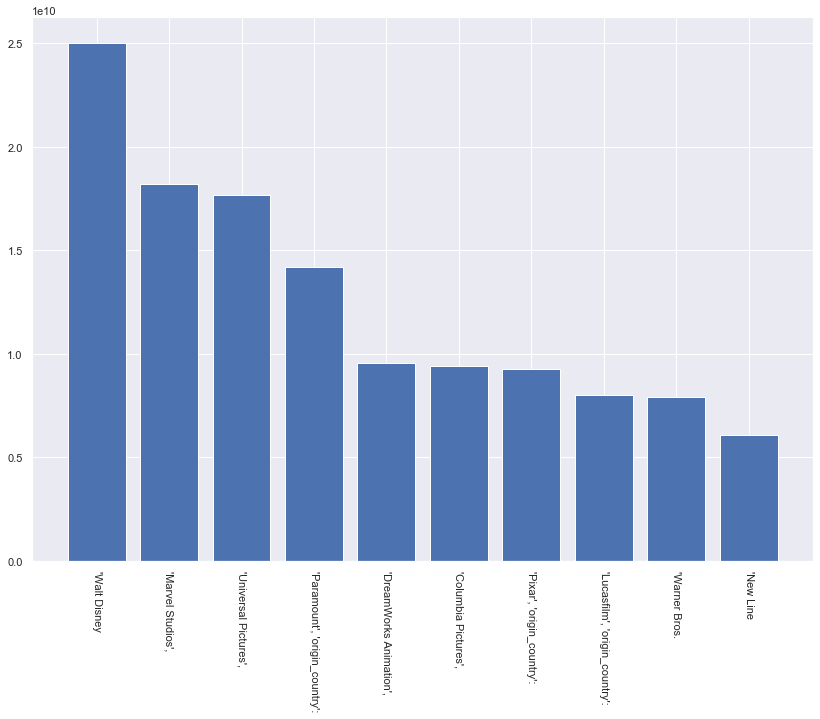

In [49]:
# Count Plot (a.k.a. Bar Plot)
plt.bar(x=top_ten['production_companies_clean'],height=top_ten['profitability'])
# Rotate x-labels
plt.xticks(rotation=-90)

# Graph 8 - top 10 competitors 

THE END :)